In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress as lin

# Question 1 

### Compute, plot and compare wind profiles for a 1 m and 5 m tall vegetated canopies. Assume zero plane displacement, d = 0.6 height and roughness length z0 = 0.1 height; assume near neutral stability, z/L = 0  for 1m vegetated canopies: d = 0.6, z0 = 0.1, z/L = 0, U at 10m = 10m/s

In [2]:
"""x as given in the notes"""
def funcX(z, d, L):
    return (1 - 15 *(z - d)/L)**0.25

In [3]:
"""The phi functions"""
def phi(z, d, L, gamma, beta):
    return (1 + gamma * (z - d)/L) ** beta

In [4]:
"""Relative speeds as given by a reference height and reference speed"""
def relative_speed(speed1, height2, height1, z0):
    return speed1 * np.log(height2/z0) * np.log(height1/z0)

In [5]:
"""Manipulated equation to calculate the friction from the speed"""
def friction(d, speed, k, z):
    z0 = z * 0.1
    return speed*k/np.log((z-d)/z0)

In [6]:
"""Plot the wind profile given reference canopy height and reference speed"""
def plot_wind_profile(canopy, speed):
    wind_speeds = []
    for i in canopy_heights:
        wind_speeds.append(relative_speed(speed, i, speed, 0.1 * canopy))
    lab = "Height: " + str(canopy) + " Speed " + str(speed)
    plt.scatter(canopy_heights, wind_speeds, label=lab)
    regress = lin(canopy_heights, wind_speeds)
    a, b = regress.slope, regress.intercept
    plt.plot(canopy_heights, a * canopy_heights + b)
    print(a, b)
    plt.legend()
    plt.title("Wind Profile and Canopy Heights")
    plt.xlabel("Heights")
    plt.ylabel("Wind Profile")
    return wind_speeds

In [7]:
"""Plot the friction given canopy speed as a pair, and the wind speeds given the respective heights"""
def plot_friction(canopy_speed, wind_speeds):
    c = canopy_speed[0]
    friction_array = []
    for i in range(len(wind_speeds)):
        friction_array.append(friction(c * 0.6, wind_speeds[i], 0.4, c)) # (d, speed, k, z):
    print(friction_array)
    lab = "Height: " + str(canopy_speed[0]) + " Speed " + str(canopy_speed[1])
    plt.scatter(x=canopy_heights, y=friction_array, label=lab)
    regress = lin(canopy_heights, friction_array)
    a, b = regress.slope, regress.intercept
    plt.plot(canopy_heights, a * canopy_heights + b)
    plt.legend()
    plt.xlabel("Heights")
    plt.ylabel("Friction")
    plt.title("Friction and Canopy Heights")
    print(a, b)
    return friction_array

In [8]:
# GLOBAL VARIABLES
canopy_heights = np.array([6, 7, 8, 9])
reference_heights = [1, 5]
speeds = [5, 10]

In [9]:
wind_profiles_1 = {} # key is a tuple of canopy height and speed, value is the wind profile

2.6404721861733207 64.42562010436852
6.2166422701623905 151.68159517812555
1.5541605675405985 19.391060068180295
4.044019032896952 50.45670159284919


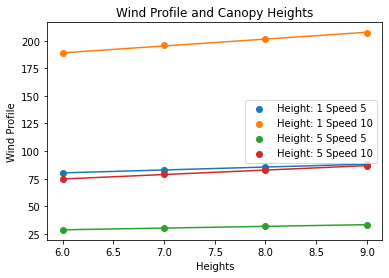

In [10]:
for c in reference_heights:
    for s in speeds:    
        wind_profiles_1[(c, s)] = plot_wind_profile(c, s)

In [11]:
friction_dict = {}

[23.10789190056769, 23.977896169068742, 24.731528145861894, 25.39627866070163]
0.7618792257194968 18.58930452615376
[54.40447292557958, 56.452782822236216, 58.22710956107156, 59.7921766620638]
1.7937437948288 43.76605703152179
[8.254681213103192, 8.766758687267346, 9.210340371976185, 9.601607147224245]
0.4484359487071998 5.595077239588743
[21.47917572578238, 22.811632033765207, 23.96585818843193, 24.98395781024082]
1.1668572408042046 14.55872663352355


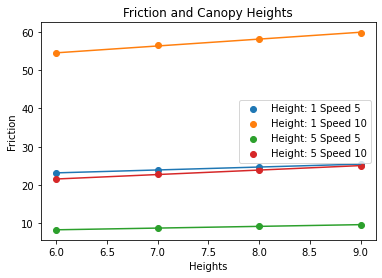

In [12]:
for key, value in wind_profiles_1.items():
    friction_dict[key] = plot_friction(key, value)

#### We can see a linear relationship in the friction and we can see that lower heights increase friction more and also that higher speeds also increase friction. Heights affect friction more than speed.

In [13]:
# Ratios: 
print("Canopy 5 / Canopy 1")
for k1, v1 in friction_dict.items():
    for k2, v2 in friction_dict.items():
        if k1 != k2 and k1[1] == k2[1]:
            if k1[0] > k2[0]:
                print("Speed is",str(k1[1]), np.array(v1)/np.array(v2))

Canopy 5 / Canopy 1
Speed is 5 [0.35722346 0.36561834 0.37241291 0.37807142]
Speed is 10 [0.39480533 0.40408339 0.41159279 0.4178466 ]


# Question 2: 

### Compare wind profiles for the 1 m tall canopy and (z-d)/L at 10 m equal to the stability cases of -1, 0 and 0.25. Use either the appropriate phi or psi functions discussed in class on your lecture notes. Hint: you will need to compute L for the case of z=10 and then recompute (z-d)/L for each new case of z and then apply that value into the phi or psi functions; as you change height you will need to change the ratio of (z-d)/L and the stability factor. Estimate d and z0 from height, h. Compute wind velocity profiles for two cases. s

In [14]:
# 1. Reference height is 10 m, u* is 0.3 m/s and U at 10 m is 5 m/s 

In [15]:
"""Psi function for unstable conditions"""
def unstable(z, d, L):
    x = funcX(z, d, L)
    return 2 * np.log((1 + x)/2) + np.log((1+x**2)/2) - 2 *np.arctan(x) + np.pi / 2

In [16]:
"""Psi function for stable conditions"""
def stable(z, d, L):
    return -4.7 * (z - d)/ L

In [17]:
"""Psi function for neutral conditions"""
def wind_profile_neutral(u_star, k, z, d):
    return u_star / k * np.log(4)

In [18]:
"""Wind profile equations as defined in the 1988 Arya paper"""
def arya_wind_profiles(u_star, k, z, d, L, stability):
    if stability > 0:
        return u_star/k * (np.log(4) - stable(z, d, L))
    elif stability < 0:
        return u_star/k * (np.log(4) - unstable(z, d, L))
    else:
        return wind_profile_neutral(u_star, k, z, d)

In [19]:
"""Equation to find L with respect to the ratio z/L, assuming d = 0.6L"""
def buoyant_production(zdl, u_star, z):
    zl = zdl/0.4
    result = zl * u_star ** 3/(z * 0.41 * 9.81)
    return result

In [20]:
# GLOBAL VARIABLES
stability = [-1, 0, 0.25] # (z-d)/L (unstable: -1, neutral: 0, stable: 0.25)
z = 10
u_star = 0.3
speed = 5
wind_profile_stability = []
L = []
x_axis = [0.5 * x for x in range(1, 21)] # heights with change in step size = 0.5

In [21]:
wind_profiles = []
for i in x_axis:
    wind_profiles.append(wind_profile_neutral(u_star, 0.4, i, 0.6 * i))

In [22]:
CONSTANT_BUOYANT = buoyant_production(0.25, 0.3, 10)

In [23]:
for x in x_axis:
    L.append((0.4 * 9.81 / u_star ** 3 * CONSTANT_BUOYANT) ** -1)

In [24]:
stability_array = []
for stab in stability:
    stability_subindex = []
    for i in range(len(x_axis)):
        wp_temp = arya_wind_profiles(u_star, 0.4, x_axis[i], 0.6*x_axis[i], L[i], stab)
        stability_subindex.append(wp_temp)
    stability_array.append(stability_subindex)

/Users/jerrysun/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


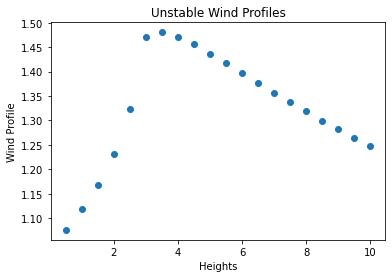

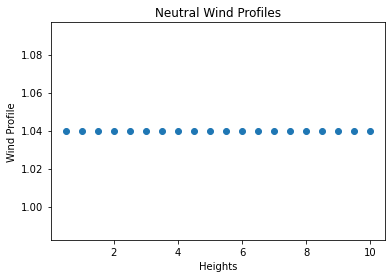

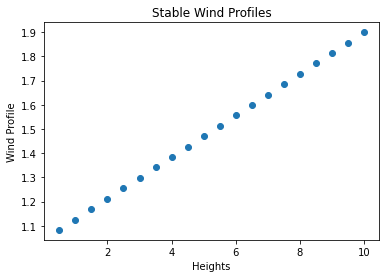

In [25]:
for i in range(len(stability_array)):
    if i == 0:
        plt.title("Unstable Wind Profiles")
    elif i == 1:
        plt.title("Neutral Wind Profiles")
    elif i == 2:
        plt.title("Stable Wind Profiles")
    plt.xlabel('Heights')
    plt.ylabel('Wind Profile')
    plt.scatter(x_axis, stability_array[i])
    plt.show()

#### Wind profiles are really different with stability. In the stable case, we see a linear relationship, in the neutral case, we see a uniform relationship, and in the unstable case we see a steep increase followed by a nearly linear decrease